In [2]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_root_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [3]:
data

['t_n103        35.2823 (32.8474, 41.1453) (32.4332, 40.0479)  7.6147 (Jnode 202)\n',
 't_n104        24.5831 (18.9088, 31.0117) (18.5889, 30.6299) 12.0410 (Jnode 201)\n',
 't_n105        23.7785 (18.2866, 30.0104) (17.9472, 29.6163) 11.6692 (Jnode 200)\n',
 't_n106        20.9320 (16.0761, 26.4733) (15.9181, 26.2655) 10.3474 (Jnode 199)\n',
 't_n107        20.3218 (15.6010, 25.7069) (15.3900, 25.4437) 10.0537 (Jnode 198)\n',
 't_n108        18.9076 (14.4931, 23.9463) (14.2701, 23.6544)  9.3843 (Jnode 197)\n',
 't_n109         8.9995 ( 6.6691, 11.8230) ( 6.4964, 11.5895)  5.0931 (Jnode 196)\n',
 't_n110         8.9287 ( 6.6176, 11.7337) ( 6.4351, 11.4925)  5.0574 (Jnode 195)\n',
 't_n111         8.7202 ( 6.4599, 11.4584) ( 6.3127, 11.2557)  4.9430 (Jnode 194)\n',
 't_n112         8.4509 ( 6.2585, 11.1127) ( 6.0956, 10.8952)  4.7996 (Jnode 193)\n',
 't_n113         8.0430 ( 5.9512, 10.5839) ( 5.8374, 10.4181)  4.5807 (Jnode 192)\n',
 't_n114         5.7292 ( 4.1647,  7.6702) ( 4.0589,  

In [4]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [5]:
model1_mean_times = {}
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    model1_mean_times[int(line[0][3:])] = float(line[1])
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [6]:
model1_mean_times

{103: 35.2823,
 104: 24.5831,
 105: 23.7785,
 106: 20.932,
 107: 20.3218,
 108: 18.9076,
 109: 8.9995,
 110: 8.9287,
 111: 8.7202,
 112: 8.4509,
 113: 8.043,
 114: 5.7292,
 115: 1.6455,
 116: 4.129,
 117: 3.34,
 118: 6.2603,
 119: 5.2408,
 120: 8.3478,
 121: 8.0133,
 122: 4.3708,
 123: 6.3835,
 124: 5.3112,
 125: 5.5858,
 126: 7.8287,
 127: 7.3371,
 128: 2.0014,
 129: 8.5165,
 130: 7.6293,
 131: 5.2435,
 132: 4.8337,
 133: 4.0327,
 134: 5.8739,
 135: 4.6353,
 136: 3.7205,
 137: 18.0766,
 138: 13.7777,
 139: 19.2871,
 140: 17.4384,
 141: 16.217,
 142: 12.6692,
 143: 11.0383,
 144: 9.8014,
 145: 8.2969,
 146: 13.3553,
 147: 6.8981,
 148: 15.8518,
 149: 14.4656,
 150: 3.1683,
 151: 1.4092,
 152: 22.2791,
 153: 19.6952,
 154: 16.0635,
 155: 12.4687,
 156: 13.4287,
 157: 20.795,
 158: 17.9156,
 159: 18.661,
 160: 23.7141,
 161: 19.8446,
 162: 22.0598,
 163: 19.7046,
 164: 5.8259,
 165: 19.8066,
 166: 18.7761,
 167: 15.8531,
 168: 10.6613,
 169: 14.0691,
 170: 11.8013,
 171: 11.2981,
 172: 1

In [7]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [8]:
posterior_mean_iqtree

[35.2823,
 24.5831,
 23.7785,
 20.932,
 20.3218,
 18.9076,
 8.9995,
 8.9287,
 8.7202,
 8.4509,
 8.043,
 5.7292,
 1.6455,
 4.129,
 3.34,
 6.2603,
 5.2408,
 8.3478,
 8.0133,
 4.3708,
 6.3835,
 5.3112,
 5.5858,
 7.8287,
 7.3371,
 2.0014,
 8.5165,
 7.6293,
 5.2435,
 4.8337,
 4.0327,
 5.8739,
 4.6353,
 3.7205,
 18.0766,
 13.7777,
 19.2871,
 17.4384,
 16.217,
 12.6692,
 11.0383,
 9.8014,
 8.2969,
 13.3553,
 6.8981,
 15.8518,
 14.4656,
 3.1683,
 1.4092,
 22.2791,
 19.6952,
 16.0635,
 12.4687,
 13.4287,
 20.795,
 17.9156,
 18.661,
 23.7141,
 19.8446,
 22.0598,
 19.7046,
 5.8259,
 19.8066,
 18.7761,
 15.8531,
 10.6613,
 14.0691,
 11.8013,
 11.2981,
 11.0357,
 10.4344,
 9.401,
 9.0258,
 8.6805,
 8.1951,
 7.5571,
 6.9675,
 6.0034,
 4.1469,
 7.7114,
 6.8513,
 6.0965,
 8.3201,
 7.5601,
 7.1206,
 5.6664,
 6.4174,
 7.4145,
 6.443,
 5.3779,
 8.9695,
 7.8916,
 8.5597,
 8.1184,
 7.1616,
 5.2514,
 4.6796,
 3.8125,
 1.3035,
 11.4833,
 9.5586]

In [9]:
lower_ci_iqtree

[]

In [10]:
upper_ci_iqtree

[]

In [11]:
file_LG = open("LG_G4_codeml_root_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

model2_mean_times = {}
        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    model2_mean_times[int(line[0][3:])] = float(line[1])
    
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [12]:
model2_mean_times

{103: 33.1732,
 104: 22.9994,
 105: 22.0129,
 106: 20.2109,
 107: 19.6199,
 108: 18.6431,
 109: 9.6008,
 110: 9.5458,
 111: 9.3226,
 112: 8.8859,
 113: 8.5118,
 114: 6.4733,
 115: 1.6172,
 116: 4.5062,
 117: 3.2041,
 118: 6.4068,
 119: 5.526,
 120: 8.8673,
 121: 8.5074,
 122: 4.3723,
 123: 6.6411,
 124: 5.4224,
 125: 5.6703,
 126: 8.278,
 127: 7.7225,
 128: 2.4412,
 129: 8.9351,
 130: 8.048,
 131: 5.2796,
 132: 4.6872,
 133: 3.7052,
 134: 6.3568,
 135: 5.0,
 136: 3.2574,
 137: 17.4118,
 138: 14.9622,
 139: 18.5765,
 140: 17.0083,
 141: 15.7519,
 142: 13.0316,
 143: 11.2573,
 144: 10.0044,
 145: 8.3812,
 146: 13.2775,
 147: 7.9415,
 148: 15.8235,
 149: 14.3494,
 150: 3.8871,
 151: 1.7332,
 152: 20.2899,
 153: 18.061,
 154: 15.4237,
 155: 12.2879,
 156: 12.7547,
 157: 19.0692,
 158: 16.8476,
 159: 17.3205,
 160: 22.263,
 161: 20.8546,
 162: 18.31,
 163: 8.1581,
 164: 18.8308,
 165: 17.4636,
 166: 15.3298,
 167: 13.3053,
 168: 11.7456,
 169: 18.9626,
 170: 13.7329,
 171: 13.0293,
 172: 12

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [14]:
posterior_mean_baseml

[33.1732,
 22.9994,
 22.0129,
 20.2109,
 19.6199,
 18.6431,
 9.6008,
 9.5458,
 9.3226,
 8.8859,
 8.5118,
 6.4733,
 1.6172,
 4.5062,
 3.2041,
 6.4068,
 5.526,
 8.8673,
 8.5074,
 4.3723,
 6.6411,
 5.4224,
 5.6703,
 8.278,
 7.7225,
 2.4412,
 8.9351,
 8.048,
 5.2796,
 4.6872,
 3.7052,
 6.3568,
 5.0,
 3.2574,
 17.4118,
 14.9622,
 18.5765,
 17.0083,
 15.7519,
 13.0316,
 11.2573,
 10.0044,
 8.3812,
 13.2775,
 7.9415,
 15.8235,
 14.3494,
 3.8871,
 1.7332,
 20.2899,
 18.061,
 15.4237,
 12.2879,
 12.7547,
 19.0692,
 16.8476,
 17.3205,
 22.263,
 20.8546,
 18.31,
 8.1581,
 18.8308,
 17.4636,
 15.3298,
 13.3053,
 11.7456,
 18.9626,
 13.7329,
 13.0293,
 12.5549,
 12.2658,
 11.1072,
 10.6131,
 10.2413,
 9.6208,
 8.8919,
 8.1433,
 7.057,
 5.1038,
 8.8195,
 8.093,
 7.3218,
 9.7992,
 8.8155,
 8.2416,
 6.7645,
 7.4167,
 8.7011,
 7.6467,
 6.3098,
 10.5117,
 9.2254,
 9.9513,
 9.1296,
 8.1069,
 5.904,
 6.1409,
 3.8337,
 1.4031,
 12.9302,
 11.2771]

In [15]:
posterior_mean_iqtree

[35.2823,
 24.5831,
 23.7785,
 20.932,
 20.3218,
 18.9076,
 8.9995,
 8.9287,
 8.7202,
 8.4509,
 8.043,
 5.7292,
 1.6455,
 4.129,
 3.34,
 6.2603,
 5.2408,
 8.3478,
 8.0133,
 4.3708,
 6.3835,
 5.3112,
 5.5858,
 7.8287,
 7.3371,
 2.0014,
 8.5165,
 7.6293,
 5.2435,
 4.8337,
 4.0327,
 5.8739,
 4.6353,
 3.7205,
 18.0766,
 13.7777,
 19.2871,
 17.4384,
 16.217,
 12.6692,
 11.0383,
 9.8014,
 8.2969,
 13.3553,
 6.8981,
 15.8518,
 14.4656,
 3.1683,
 1.4092,
 22.2791,
 19.6952,
 16.0635,
 12.4687,
 13.4287,
 20.795,
 17.9156,
 18.661,
 23.7141,
 19.8446,
 22.0598,
 19.7046,
 5.8259,
 19.8066,
 18.7761,
 15.8531,
 10.6613,
 14.0691,
 11.8013,
 11.2981,
 11.0357,
 10.4344,
 9.401,
 9.0258,
 8.6805,
 8.1951,
 7.5571,
 6.9675,
 6.0034,
 4.1469,
 7.7114,
 6.8513,
 6.0965,
 8.3201,
 7.5601,
 7.1206,
 5.6664,
 6.4174,
 7.4145,
 6.443,
 5.3779,
 8.9695,
 7.8916,
 8.5597,
 8.1184,
 7.1616,
 5.2514,
 4.6796,
 3.8125,
 1.3035,
 11.4833,
 9.5586]

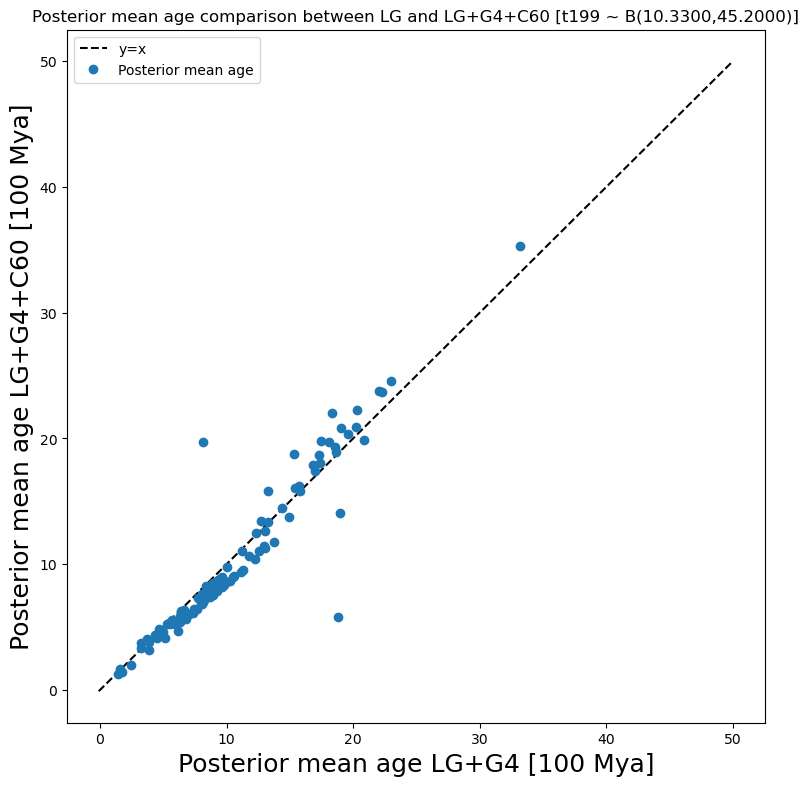

In [16]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t199 ~ B(10.3300,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()


In [17]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')

In [18]:
import copy
from ete3 import Tree

iqtree_file = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4.tree"
mcmctree_file = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_C60.tree"

tree_iqtree = Tree(iqtree_file)

iqtree_node_traversal = []
for node in tree_iqtree.traverse("preorder"):
    edge = node.get_edges()[0]
    clade_1 = list(edge[0])
    clade_2 = list(edge[1])
    node_name = clade_1 + clade_2
    node_name = [node.name for node in node_name]
    # node_name.sort()
    node_name = ':'.join(node_name)
    node.name = node_name
    iqtree_node_traversal.append(node.name)

tree_mcmctree = Tree(mcmctree_file)

mcmctree_node_traversal = []
for node in tree_mcmctree.traverse("preorder"):
    edge = node.get_edges()[0]
    clade_1 = list(edge[0])
    clade_2 = list(edge[1])
    node_name = clade_1 + clade_2
    node_name = [node.name for node in node_name]
    # node_name.sort()
    node_name = ':'.join(node_name)
    node.name = node_name
    mcmctree_node_traversal.append(node.name)



In [19]:
iqtree_node_traversal

['Volvox:Leishmania_major:Sulfolobus_solfataricus:Hydra:Staphylothermus_marinus:Ar5:Limulus:Ignicoccus_hospitalis:Fibrobacter:Aeropyrum_pernix:Nanosalina:Amphimedon:Hyperthermus_butylicus:Parvarchaeum_acidophilus:Agaricus:Ar13:Nanoarchaeum:Ar6:Micrarchaeum_acidiphilum:Homo_sapiens:Ar15:DUSEL3:DUSEL4:Loki3:Saccharomyces_cerevisiae:Loki2:Dictyostelium_discoideum:Nanosalinarum:Caldivirga_maquilingensis:Batrachochytrium:Lokiarchaeum:Chondrus:Haloarcula_marismortui:Cyanidioschyzon:Methanosarcina_mazei:Cyanophora:Polysphondylium:Thermoplasma_volcanium:Rhodopseudomonas_palustris:Methanomassiliicoccus_luminyensis:Rickettsia:Escherichia_coli:Tetrahymena:Campylobacter_jejuni:Methanothermobacter_thermautotro:Desulfurispirillum:Methanopyrus_kandleri:Oscillochloris:Ectocarpus:Methanococcus_jannaschii:Microgenomates:Thalassiosira_pseudonana:Pyrococcus_furiosus:Parcubacteria:Paramecium:Actinomadura:Pyrobaculum_aerophilum:Oryza_sativa:Thermofilum_pendens:Crenynpffa:Elusimicrobium:Rhodopirellula_baltic

In [20]:
mcmctree_node_traversal

['Volvox:Thermodesulfatator:Kosmotoga:Loki3:Micrarchaeum_acidiphilum:Loki2:Methanomassiliicoccus_luminyensis:Lokiarchaeum:Thermoplasma_volcanium:Pyrococcus_furiosus:Methanosarcina_mazei:Methanococcus_jannaschii:Dictyostelium_discoideum:Polysphondylium:Thermodesulfovibrio:Dictyoglomus:Batrachochytrium:Saccharomyces_cerevisiae:Agaricus:Caldisericum:Nitrosopumilus_maritimus:Parvarchaeum_acidophilus:Amphimedon:Nanoarchaeum:Hydra:Jonquetella:Homo_sapiens:Candidatus:Limulus:Chlorogloeopsis:Nanosalinarum:Gloeobacter:Hyperthermus_butylicus:Synechocystis_sp._PCC6803:Archaeoglobus_fulgidus:Aquifex:DUSEL4:Giardia_lamblia:Trichomonas_vaginalis:Aeropyrum_pernix:Nanosalina:Bodo:Ignicoccus_hospitalis:Leishmania_major:Cylindrosperopsis:Ar5:Elphidium:Reticulomyxa:Phytophthora_ramorum:Rickettsia:Thalassiosira_pseudonana:Rhodopseudomonas_palustris:Ectocarpus:Chlorobium:Escherichia_coli:Tetrahymena:Desulfurispirillum:Caldithrix:Paramecium:Campylobacter_jejuni:Gemmatimonas:Cyanophora:Fibrobacter:Galdieria:

In [21]:
LG_G4_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_times_index.tree"
LG_G4_C60_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_C60_times_index.tree"
# Load the tree using ETE3
tree1 = Tree(LG_G4_index_tree)
tree2 = Tree(LG_G4_C60_index_tree)


# Function to traverse the tree and populate the dictionary
def traverse_and_collect(node, clade_values):
    if not node.is_leaf():
        clade_name = node.name if node.name else "root"
        # Retrieve the support value (if exists)
        if clade_name == "root":
            clade_name = "root:1"
        support_value = node.support if node.support else None
        clade_values[clade_name] = support_value
        for child in node.get_children():
            # print(child)
            # print(child.get_leaf_names())
            child_names = child.get_leaf_names()
            cleaned_child_names = ["_".join(name.split('_')[1:]) for name in child_names]
            cleaned_child_names.sort()
            final_child_name = ":".join(cleaned_child_names)+":"+str(len(cleaned_child_names))
            support_value = node.support if node.support else None
            # print(support_value)
            clade_values[final_child_name] = support_value
            traverse_and_collect(child, clade_values)



In [22]:
# Start the traversal from the root
clade_values_tree1 = {}

traverse_and_collect(tree1, clade_values_tree1)

# Display the clade names with their associated values
for clade, value in clade_values_tree1.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 203.0
Clade: Aeropyrum_pernix:Agaricus:Amphimedon:Ar13:Ar15:Ar5:Ar6:Arabidopsis_thaliana:Archaeoglobus_fulgidus:Batrachochytrium:Bodo:Caldiarchaeum_subterraneum:Caldivirga_maquilingensis:Cenarchaeum_symbiosum:Chlamydomonas:Chondrus:Crenynpffa:Cyanidioschyzon:Cyanophora:DUSEL3:DUSEL4:Dictyostelium_discoideum:Ectocarpus:Elphidium:Galdieria:Giardia_lamblia:Haloarcula_marismortui:Homo_sapiens:Hydra:Hyperthermus_butylicus:Ignicoccus_hospitalis:Korarchaeum_cryptofilum:Leishmania_major:Limulus:Loki2:Loki3:Lokiarchaeum:Methanococcus_jannaschii:Methanomassiliicoccus_luminyensis:Methanopyrus_kandleri:Methanosarcina_mazei:Methanothermobacter_thermautotro:Micrarchaeum_acidiphilum:Nanoarchaeum:Nanosalina:Nanosalinarum:Nitrosoarchaeum_limnia:Nitrosopumilus_maritimus:Oryza_sativa:Paramecium:Parvarchaeum_acidophilus:Physcomitrella:Phytophthora_ramorum:Polysphondylium:Pyrobaculum_aerophilum:Pyrococcus_furiosus:Reticulomyxa:Saccharomyces_cerevisiae:Staphylothermus_marinus:S

In [23]:
# Start the traversal from the root
clade_values_tree2 = {}

traverse_and_collect(tree2, clade_values_tree2)

# Display the clade names with their associated values
for clade, value in clade_values_tree2.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 203.0
Clade: Aeropyrum_pernix:Agaricus:Amphimedon:Ar13:Ar15:Ar5:Ar6:Arabidopsis_thaliana:Archaeoglobus_fulgidus:Batrachochytrium:Bodo:Caldiarchaeum_subterraneum:Caldivirga_maquilingensis:Cenarchaeum_symbiosum:Chlamydomonas:Chondrus:Crenynpffa:Cyanidioschyzon:Cyanophora:DUSEL3:DUSEL4:Dictyostelium_discoideum:Ectocarpus:Elphidium:Galdieria:Giardia_lamblia:Haloarcula_marismortui:Homo_sapiens:Hydra:Hyperthermus_butylicus:Ignicoccus_hospitalis:Korarchaeum_cryptofilum:Leishmania_major:Limulus:Loki2:Loki3:Lokiarchaeum:Methanococcus_jannaschii:Methanomassiliicoccus_luminyensis:Methanopyrus_kandleri:Methanosarcina_mazei:Methanothermobacter_thermautotro:Micrarchaeum_acidiphilum:Nanoarchaeum:Nanosalina:Nanosalinarum:Nitrosoarchaeum_limnia:Nitrosopumilus_maritimus:Oryza_sativa:Paramecium:Parvarchaeum_acidophilus:Physcomitrella:Phytophthora_ramorum:Polysphondylium:Pyrobaculum_aerophilum:Pyrococcus_furiosus:Reticulomyxa:Saccharomyces_cerevisiae:Staphylothermus_marinus:S

In [24]:
diff_indexes = []
for clade, value in clade_values_tree1.items():
    names = clade.split(":")
    len_of_clade = int(names[-1])
    for clade2, value2 in clade_values_tree2.items():
        names2 = clade2.split(":")
        len_of_clade2 = int(names2[-1])
        if clade == clade2 and value != value2:
           print(f"Clade: {clade}, Support Value LG_G4: {value}, Support Value LG_G4_C60: {value2}")
           diff_indexes.append([int(value), int(value2)])

Clade: Ar5:Nanosalina:Nanosalinarum:3, Support Value LG_G4: 161.0, Support Value LG_G4_C60: 162.0
Clade: Ar5:1, Support Value LG_G4: 162.0, Support Value LG_G4_C60: 163.0
Clade: Nanosalina:Nanosalinarum:2, Support Value LG_G4: 162.0, Support Value LG_G4_C60: 163.0
Clade: Nanosalina:1, Support Value LG_G4: 163.0, Support Value LG_G4_C60: 164.0
Clade: Nanosalinarum:1, Support Value LG_G4: 163.0, Support Value LG_G4_C60: 164.0
Clade: Ar13:Ar15:Ar6:DUSEL4:Nanoarchaeum:Parvarchaeum_acidophilus:6, Support Value LG_G4: 161.0, Support Value LG_G4_C60: 162.0
Clade: Ar13:Ar15:Ar6:DUSEL4:Parvarchaeum_acidophilus:5, Support Value LG_G4: 164.0, Support Value LG_G4_C60: 165.0
Clade: Ar13:Ar15:Ar6:DUSEL4:4, Support Value LG_G4: 165.0, Support Value LG_G4_C60: 166.0
Clade: Ar15:DUSEL4:2, Support Value LG_G4: 166.0, Support Value LG_G4_C60: 167.0
Clade: DUSEL4:1, Support Value LG_G4: 167.0, Support Value LG_G4_C60: 169.0
Clade: Ar15:1, Support Value LG_G4: 167.0, Support Value LG_G4_C60: 169.0
Clade: A

In [25]:
diff_indexes

[[161, 162],
 [162, 163],
 [162, 163],
 [163, 164],
 [163, 164],
 [161, 162],
 [164, 165],
 [165, 166],
 [166, 167],
 [167, 169],
 [167, 169],
 [166, 167],
 [165, 166],
 [164, 165],
 [169, 161],
 [169, 161]]

In [26]:
len(diff_indexes)

16

In [27]:
unique_data = [list(t) for t in set(tuple(inner) for inner in diff_indexes)]

# Print the result
print(unique_data)

[[163, 164], [167, 169], [164, 165], [166, 167], [169, 161], [165, 166], [162, 163], [161, 162]]


In [28]:
model2_keys = [i[0] for i in unique_data]
model1_keys = [i[1] for i in unique_data]

In [29]:
model2_keys

[163, 167, 164, 166, 169, 165, 162, 161]

In [30]:
model1_keys

[164, 169, 165, 167, 161, 166, 163, 162]

In [31]:
mapped_keys = {}
for i in range(len(model2_keys)):
    mapped_keys[model2_keys[i]] = model1_keys[i]

In [32]:
mapped_keys

{163: 164,
 167: 169,
 164: 165,
 166: 167,
 169: 161,
 165: 166,
 162: 163,
 161: 162}

In [33]:
model1_revised_times = {}
for key, value in model1_mean_times.items():
    if key in model1_keys:
        model1_revised_times[key] = model1_mean_times[mapped_keys[key]]
    else:
        model1_revised_times[key] = value

In [34]:
model1_revised_times

{103: 35.2823,
 104: 24.5831,
 105: 23.7785,
 106: 20.932,
 107: 20.3218,
 108: 18.9076,
 109: 8.9995,
 110: 8.9287,
 111: 8.7202,
 112: 8.4509,
 113: 8.043,
 114: 5.7292,
 115: 1.6455,
 116: 4.129,
 117: 3.34,
 118: 6.2603,
 119: 5.2408,
 120: 8.3478,
 121: 8.0133,
 122: 4.3708,
 123: 6.3835,
 124: 5.3112,
 125: 5.5858,
 126: 7.8287,
 127: 7.3371,
 128: 2.0014,
 129: 8.5165,
 130: 7.6293,
 131: 5.2435,
 132: 4.8337,
 133: 4.0327,
 134: 5.8739,
 135: 4.6353,
 136: 3.7205,
 137: 18.0766,
 138: 13.7777,
 139: 19.2871,
 140: 17.4384,
 141: 16.217,
 142: 12.6692,
 143: 11.0383,
 144: 9.8014,
 145: 8.2969,
 146: 13.3553,
 147: 6.8981,
 148: 15.8518,
 149: 14.4656,
 150: 3.1683,
 151: 1.4092,
 152: 22.2791,
 153: 19.6952,
 154: 16.0635,
 155: 12.4687,
 156: 13.4287,
 157: 20.795,
 158: 17.9156,
 159: 18.661,
 160: 23.7141,
 161: 22.0598,
 162: 19.7046,
 163: 5.8259,
 164: 19.8066,
 165: 18.7761,
 166: 15.8531,
 167: 14.0691,
 168: 10.6613,
 169: 19.8446,
 170: 11.8013,
 171: 11.2981,
 172: 1

In [35]:
model1_mean_posterior_times = np.array(list(model1_revised_times.values()))
model2_mean_posterior_times = np.array(list(model2_mean_times.values()))

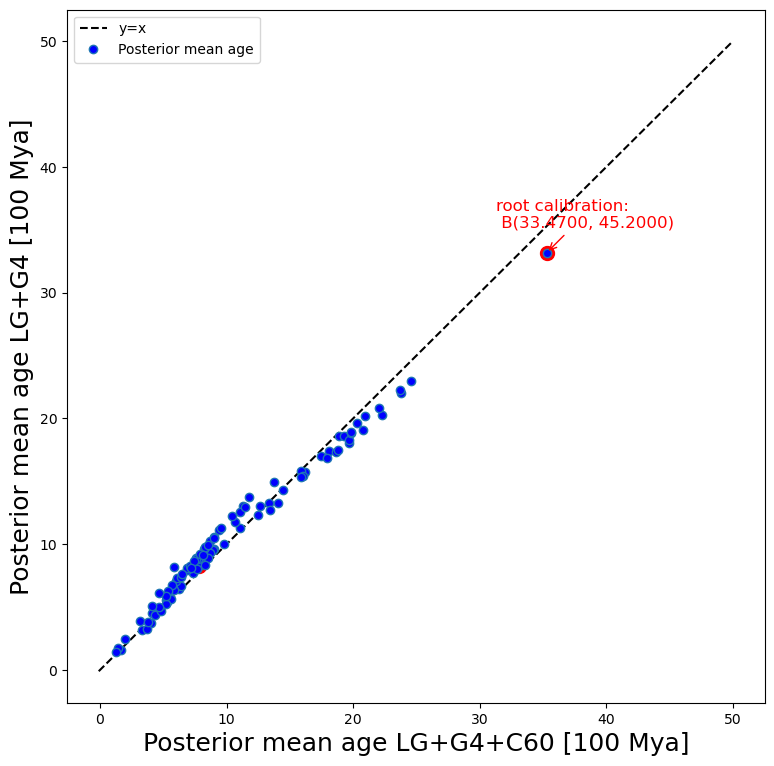

In [36]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
points = ax.plot(model1_mean_posterior_times, model2_mean_posterior_times, 'o', label='Posterior mean age')
points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[23], posterior_mean_baseml[23], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n B(33.4700, 45.2000)', 
        xy=(model1_mean_posterior_times[0], model2_mean_posterior_times[0]), 
        xytext=(model1_mean_posterior_times[0] -4,  model2_mean_posterior_times[0] + 2),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
# ax.annotate('middle calibration:\n B (10.3300, 45.2000)', 
#         xy=(model1_mean_posterior_times[23], model2_mean_posterior_times[23]), 
#         xytext=(model1_mean_posterior_times[23] -6,  model2_mean_posterior_times[23] + 10),  # Offset position for the label
#         arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
#         fontsize=12, color='red') 
# Labels and title
ax.set_xlabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t199 ~ B(10.3300,45.2000)]')
ax.legend()

plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_root_scatter.png')